# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [125]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

In [126]:
#Class Names
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [127]:
#Create validation data
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[5000:], y_train[5000:]

In [128]:
#Convert Data to TensorFlow
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_data = tf.data.Dataset.from_tensor_slices((x_val,y_val))

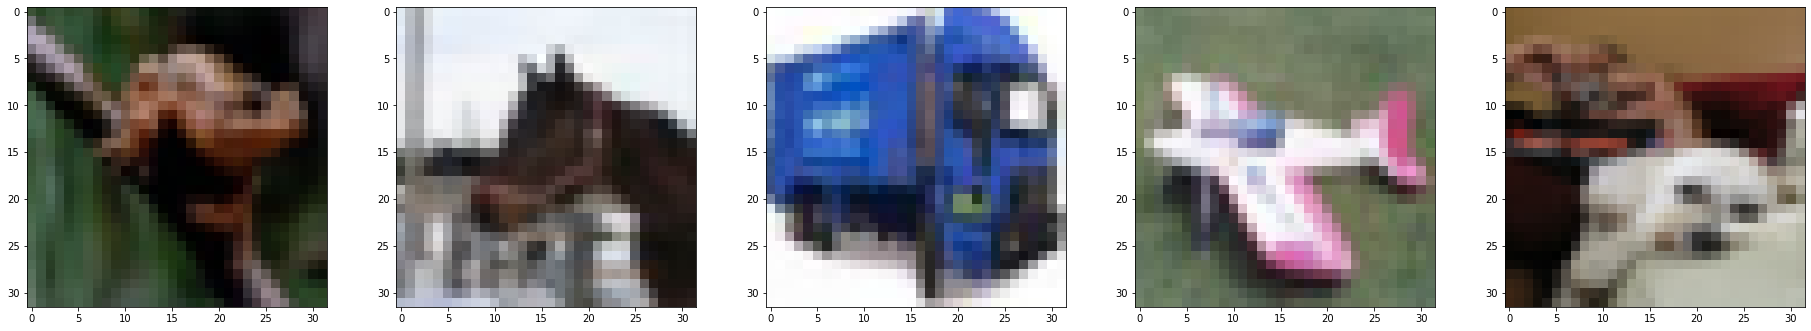

In [129]:
# plot images
plt.figure(figsize=(32,32))
for i, (image, label) in enumerate(train_data.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)

In [130]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    return image, label

In [131]:
#sizes of the data
train_data_size = tf.data.experimental.cardinality(train_data).numpy()
test_data_size = tf.data.experimental.cardinality(test_data).numpy()
val_data_size = tf.data.experimental.cardinality(val_data).numpy()
print("Training data size:", train_data_size)
print("Test data size:", test_data_size)
print("Validation data size:", val_data_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [132]:
#Preprocessing
train_data = (train_data
                  .map(process_images)
                  .shuffle(buffer_size=train_data_size)
                  .batch(batch_size=batch_size, drop_remainder=True))
test_data = (test_data
                  .map(process_images)
                  .shuffle(buffer_size=train_data_size)
                  .batch(batch_size=batch_size, drop_remainder=True))
val_data = (val_data
                  .map(process_images)
                  .shuffle(buffer_size=train_data_size)
                  .batch(batch_size=batch_size, drop_remainder=True))


In [133]:
inputs = keras.Input(shape=(32,32,3))

In [134]:
#build model
l1=keras.layers.Conv2D(filters=32, kernel_size=(5,5),strides=(4,4),activation='relu')(inputs)
l2=keras.layers.BatchNormalization()(l1)
l3=keras.layers.MaxPool2D(pool_size=(3,3),strides=(1,1))(l2)
l4=keras.layers.Conv2D(filters=64, kernel_size=(5,5),strides=(1,1),activation='relu',padding='same')(l3)
l5=keras.layers.BatchNormalization()(l4)
l6=keras.layers.MaxPool2D(pool_size=(3,3),strides=(1,1))(l5)
l7=keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1), activation='relu', padding='same')(l6)
l8=keras.layers.BatchNormalization()(l7)
l9=keras.layers.MaxPool2D(pool_size=(1,1),strides=(2,2))(l8)
l10=keras.layers.Flatten()(l9)
l11=keras.layers.Dense(256, activation='relu')(l10)
l12=keras.layers.Dropout(0.5)(l11)
outputs=keras.layers.Dense(num_classes,activation='softmax')(l12)

In [135]:
model = keras.Model(inputs=inputs,outputs=outputs)

In [136]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 7, 7, 32)          2432      
_________________________________________________________________
batch_normalization_75 (Batc (None, 7, 7, 32)          128       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 5, 5, 64)          51264     
_________________________________________________________________
batch_normalization_76 (Batc (None, 5, 5, 64)          256       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 3, 3, 64)          0  

In [137]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [138]:
model.fit(train_data,batch_size=batch_size,epochs=epochs)

Epoch 1/10
1406/1406 [==============================] - 8s 4ms/step - loss: 1.9064 - accuracy: 0.3131
Epoch 2/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.5372 - accuracy: 0.4544
Epoch 3/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.4147 - accuracy: 0.5013
Epoch 4/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.3525 - accuracy: 0.5236
Epoch 5/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.2886 - accuracy: 0.5488
Epoch 6/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.2419 - accuracy: 0.5679
Epoch 7/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.1977 - accuracy: 0.5868
Epoch 8/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.1606 - accuracy: 0.5950
Epoch 9/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.1321 - accuracy: 0.6035
Epoch 10/10
1406/1406 [==============================] - 7s 4ms/step - loss: 1.101

In [139]:
model.evaluate(test_data)

312/312 [==============================] - 1s 2ms/step - loss: 1.3640 - accuracy: 0.5429


[1.3640096187591553, 0.5428686141967773]